In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
matplotlib.rcParams['figure.dpi'] = 100

In [20]:
COLUMNS = ['load_image', 'make_interpreter', 'set_input', 'invoke_interpreter', 'get_output']
path = '../logs/api_timing_v3.csv'
df = pd.read_csv(path, names=COLUMNS, header=None)

In [21]:
COLUMNS.append('total')

In [22]:
df['total'] = df.sum(axis=1)

In [23]:
df.head()

,load_image,make_interpreter,set_input,invoke_interpreter,get_output,total
0,28.962372,2818.376318,112.556652,41.594791,13.183580,3014.673713
1,0.261627,0.064240,91.014626,17.778863,4.251658,113.371014
2,0.302145,0.037111,91.049181,17.777122,4.458970,113.624529
3,0.256923,0.037610,91.594453,17.859214,4.698116,114.446316
4,0.261257,0.037258,91.241123,17.799326,4.445155,113.784119


In [24]:
df.drop(0, axis=0, inplace=True)
df.head()

,load_image,make_interpreter,set_input,invoke_interpreter,get_output,total
1,0.261627,0.064240,91.014626,17.778863,4.251658,113.371014
2,0.302145,0.037111,91.049181,17.777122,4.458970,113.624529
3,0.256923,0.037610,91.594453,17.859214,4.698116,114.446316
4,0.261257,0.037258,91.241123,17.799326,4.445155,113.784119
5,0.258701,0.037425,91.013015,17.901936,4.105437,113.316514


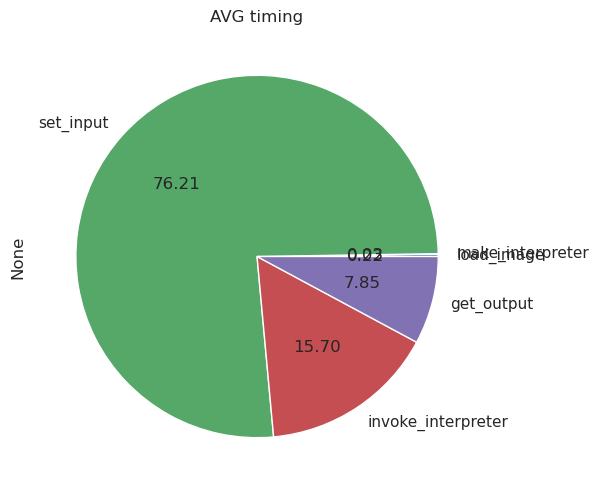

In [7]:
plt.figure()
df[COLUMNS[:-1]].mean(axis=0).plot(kind='pie', title='AVG timing', 
                     figsize=(6, 6), autopct="%.2f")

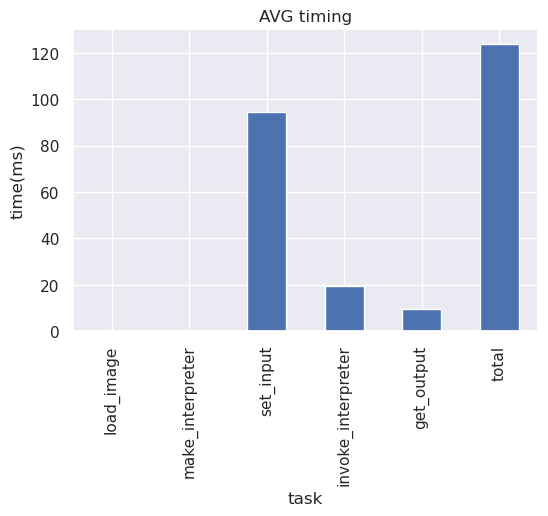

In [25]:
df.mean(axis=0).plot(kind='bar', title='AVG timing', 
                      ylabel='time(ms)', xlabel='task')

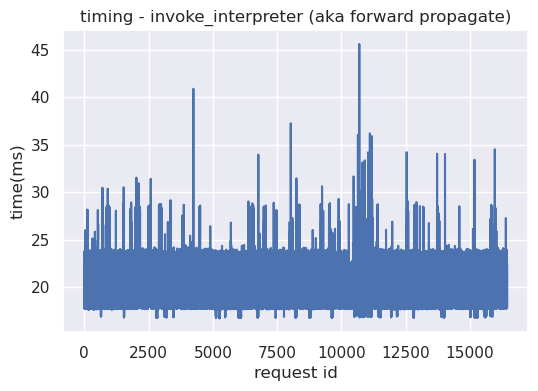

In [9]:
df['invoke_interpreter'].plot(title='timing - invoke_interpreter (aka forward propagate)', 
                      ylabel='time(ms)', xlabel='request id')

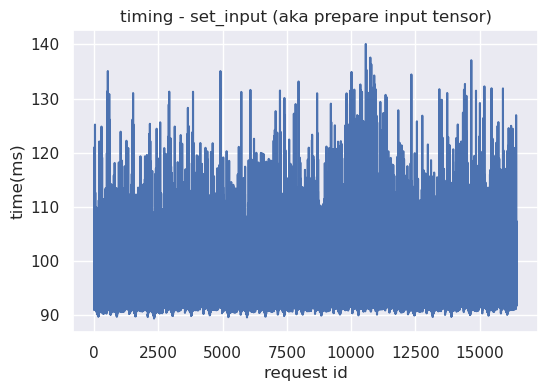

In [10]:
df['set_input'].plot(title='timing - set_input (aka prepare input tensor)',
                      ylabel='time(ms)', xlabel='request id')

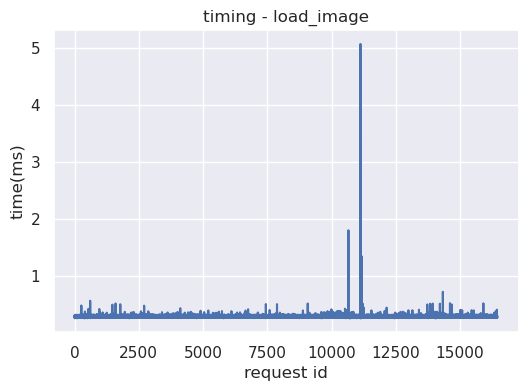

In [11]:
df['load_image'].plot(title='timing - load_image',
                      ylabel='time(ms)', xlabel='request id')

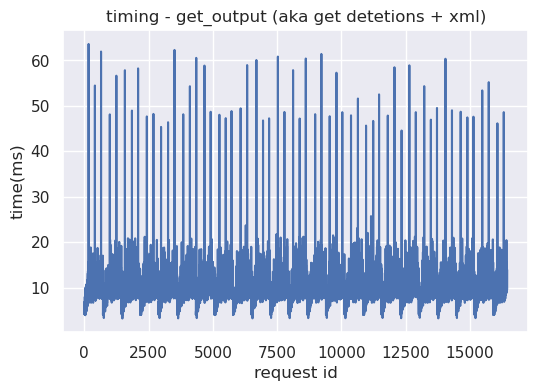

In [12]:
plt.figure();
df['get_output'].plot(title='timing - get_output (aka get detetions + xml)', 
                      ylabel='time(ms)', xlabel='request id')

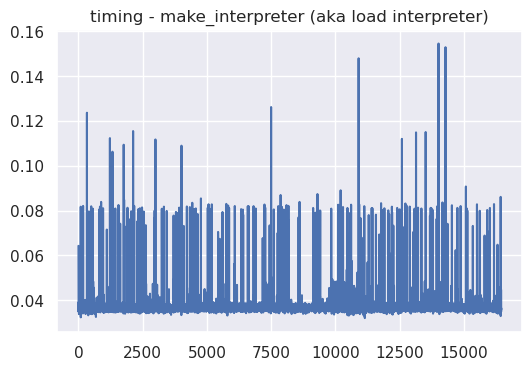

In [13]:
df['make_interpreter'].plot(title='timing - make_interpreter (aka load interpreter)')

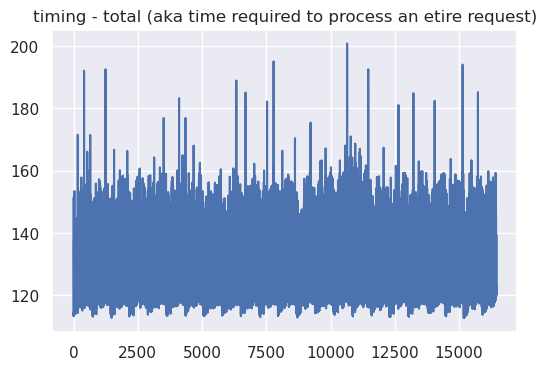

In [18]:
df = pd.read_csv('../logs/api_timing_v3.csv')
df['total'] = df.sum(axis=1)
df = df.drop([0])
df['total'].plot(title='timing - total (aka time required to process an etire request)')